# Day 26

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 다항 회귀와 과최적화

## 선형 기저 함수 모형 

일반적인 선형 회귀 모형은 다음과 같은 수식을 만족한다.

$$ y_i = \sum_{i=1}^{D} w_i x_i = w^T x $$

이 때 가중치 벡터 $w$의 차원은 독립 변수의 차원과 같다. 즉 $x \in \mathbf{R}^D$  이면 $w \in \mathbf{R}^D$  이다.


선형 기저 함수 모형(Linear Basis Function Models)은 x를 직접 선형 조합(linear combination)하지 않고 기저 함수를 통해 변환한 값을 새로운 독립 변수로 가정하고 선형 회귀 모형을 적용한 것과 같다. 따라서 기저 함수에 따라 가중치 벡터의 차원이 달라질 수 있다. 즉, $ \phi(\cdot): \mathbf{R}^D \rightarrow \mathbf{R}^M $ 이면  $w \in \mathbf{R}^M$  이다.

$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$


**선형으로 변환시키면 아무 의미가 없다. 해봤자 결국 똑같은 모형으로 된다. 즉 비선형함수로 변형을 시켜야 '의미'있는 변환이 일어나게 된다.**


## 다항 회귀

다항 회귀는 다음과 같은 다항식 함수를 기저 함수로 사용하는 선형 기저 함수 모형의 일종이다.

$$ 1, x, x^2, \ldots, x^M $$

따라서 종속 변수와 독립 변수의 관계는 다음과 같이 표현할 수 있다.

$$ y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M $$


## Scikit-Learn을 이용한 다항 회귀

Scikit-Learn에서는 preprocessing 서브 패키지의 `PolynomialFeatures` 클래스를 사용하여 다항 회귀를 할 수 있다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polyreg(degree, seed=0, plot=True):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])

    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]

    model.fit(X, y)
    
    if plot:
        plt.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        plt.plot(xx, model.predict(xx[:, np.newaxis]))
        plt.ylim(-2, 2)
        plt.show()
    
    reg = model.named_steps["linear_regression"]
    return reg.coef_, reg.intercept_

## StatsModels를 이용한 다항 회귀

StatsModels에서는 `OLS` 클래스의 `from_formula` 메서드를 사용하여 다항 회귀를 할 수 있다.

In [4]:
import statsmodels as sm
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.tools.tools.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [5]:
from statsmodels.regression.linear_model import OLS
print(OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     25.20
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.63e-05
Time:                        17:25:25   Log-Likelihood:                -20.253
No. Observations:                  30   AIC:                             44.51
Df Residuals:                      28   BIC:                             47.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5367      0.207      2.595      0.0

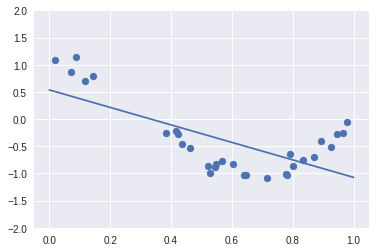

(array([ 0.        , -1.60931179]), 0.53668033031787321)

In [6]:
polyreg(1)

In [7]:
print(OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.19e-16
Time:                        17:25:25   Log-Likelihood:                 10.181
No. Observations:                  30   AIC:                            -14.36
Df Residuals:                      27   BIC:                            -10.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5411      0.107     14.378      0.0

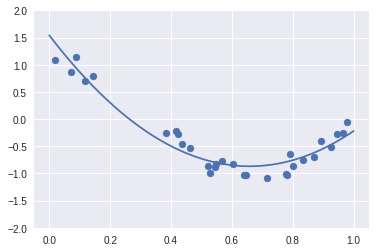

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392566)

In [8]:
polyreg(2)

In [9]:
print(OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     289.3
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           4.40e-20
Time:                        17:25:26   Log-Likelihood:                 23.183
No. Observations:                  30   AIC:                            -38.37
Df Residuals:                      26   BIC:                            -32.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1694      0.094     12.418      0.0

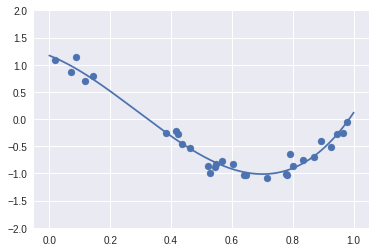

(array([ 0.        , -2.19617614, -7.05669992,  8.202858  ]),
 1.1693941158316374)

In [10]:
polyreg(3)

In [11]:
print(OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     225.7
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           3.17e-19
Time:                        17:25:26   Log-Likelihood:                 24.329
No. Observations:                  30   AIC:                            -38.66
Df Residuals:                      25   BIC:                            -31.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0311      0.135      7.645      0.0

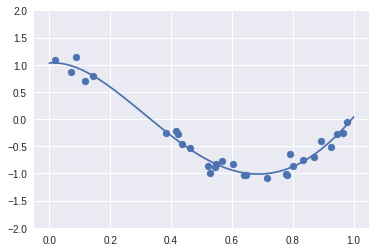

(array([  0.        ,   0.46754142, -17.78954475,  23.5926603 ,  -7.26289872]),
 1.0310751547291346)

In [12]:
polyreg(4)

In [13]:
print(OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     182.9
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.73e-18
Time:                        17:25:26   Log-Likelihood:                 25.117
No. Observations:                  30   AIC:                            -38.23
Df Residuals:                      24   BIC:                            -29.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1269      0.158      7.118      0.0

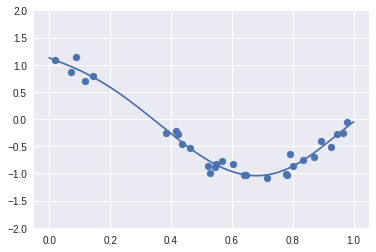

(array([  0.        ,  -2.17893409,   0.83127959, -26.17982339,
         48.6673596 , -22.31700272]), 1.1268720279438129)

In [14]:
polyreg(5)

## 과최적화 (중요!!!)

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
* 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나 
* 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다. 

과최적화가 문제가 되는 이유는 다음과 같다.

* 샘플이 조금만 변화해도 fitting 결과가 크게 달라지며
* 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)



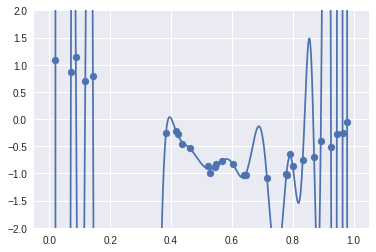

(array([ -8.00098485e+11,  -7.02812821e+05,   2.87950681e+07,
         -6.28248340e+08,   8.37596820e+09,  -7.31457926e+10,
          4.34057797e+11,  -1.77517918e+12,   4.95156456e+12,
         -8.93223227e+12,   8.67143684e+12,  -2.88549989e+11,
         -7.85460760e+12,   2.55427223e+12,   7.02400791e+12,
         -7.45757892e+11,  -7.28865289e+12,  -2.65601135e+12,
          5.17056330e+12,   6.21124745e+12,   3.55924135e+11,
         -5.62895496e+12,  -6.00830693e+12,  -7.59698940e+11,
          4.98201038e+12,   6.55091231e+12,   2.82136744e+12,
         -2.79480987e+12,  -6.58745706e+12,  -5.53324630e+12,
         -8.15072095e+11,   4.35937587e+12,   6.69585776e+12,
          5.01078932e+12,   2.46728283e+11,  -4.73645956e+12,
         -7.03572786e+12,  -5.03676981e+12,  -9.25866675e+10,
          5.13257215e+12,   7.27756792e+12,   5.03552944e+12,
         -6.98970729e+11,  -6.36917110e+12,  -7.78125211e+12,
         -3.04894985e+12,   5.21881745e+12,   9.43511207e+12,
        

In [15]:
polyreg(50)

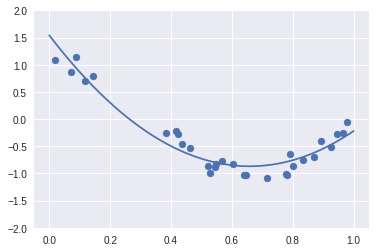

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392566)

In [16]:
polyreg(2, 0)

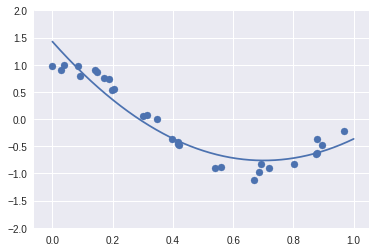

(array([ 0.        , -6.23625845,  4.44609448]), 1.4254320912432312)

In [17]:
polyreg(2, 1)

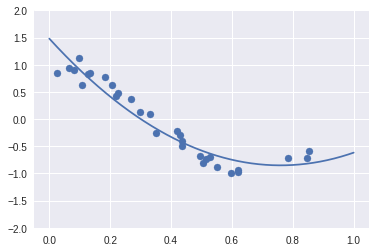

(array([ 0.        , -6.13954485,  4.0416645 ]), 1.4805367495708417)

In [18]:
polyreg(2, 2)

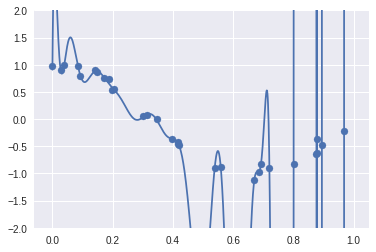

(array([ -6.00011542e+11,   6.45939362e+02,  -7.42963066e+04,
          3.49516463e+06,  -9.00078595e+07,   1.44336993e+09,
         -1.54728508e+10,   1.15462460e+11,  -6.11975011e+11,
          2.30937412e+12,  -6.08560454e+12,   1.05486143e+13,
         -9.98736102e+12,   5.34747740e+11,   8.15912267e+12,
         -2.35770831e+12,  -7.13899430e+12,   4.33624226e+11,
          6.32948089e+12,   3.29748720e+12,  -3.34783883e+12,
         -5.59067345e+12,  -2.03949547e+12,   2.84101980e+12,
          4.89845515e+12,   3.05015565e+12,  -9.28833828e+11,
         -3.78473687e+12,  -4.00199790e+12,  -2.01645006e+12,
          1.10417527e+12,   3.39447182e+12,   3.71741008e+12,
          2.16284707e+12,  -2.24025994e+11,  -2.41443914e+12,
         -3.33627924e+12,  -2.78480056e+12,  -1.04052866e+12,
          9.95245350e+11,   2.65175196e+12,   3.00661743e+12,
          2.06332437e+12,   1.71425464e+11,  -1.85393551e+12,
         -2.89357434e+12,  -2.35338140e+12,  -1.77080013e+11,
        

In [19]:
polyreg(50, 1)

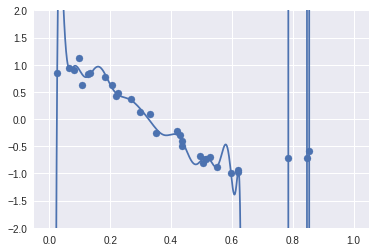

(array([ -9.50643941e+11,   1.99450336e+04,  -9.46029974e+05,
          2.53228267e+07,  -4.32706717e+08,   5.03492422e+09,
         -4.13759013e+10,   2.44676723e+11,  -1.04516267e+12,
          3.18118376e+12,  -6.60854014e+12,   8.32175447e+12,
         -3.68321045e+12,  -4.75382839e+12,   4.95966683e+12,
          3.94760401e+12,  -3.74970172e+12,  -5.02186392e+12,
          5.91409078e+11,   4.99901886e+12,   3.65933663e+12,
         -1.10177293e+12,  -4.52986882e+12,  -4.13341414e+12,
         -8.21362885e+11,   2.78351845e+12,   4.49497518e+12,
          3.67494775e+12,   1.09945265e+12,  -1.80730155e+12,
         -3.78467454e+12,  -4.19996125e+12,  -3.11578893e+12,
         -1.08307220e+12,   1.16383670e+12,   2.96845600e+12,
          3.91343074e+12,   3.86687104e+12,   2.94655856e+12,
          1.43533991e+12,  -3.11717007e+11,  -1.94985326e+12,
         -3.19882353e+12,  -3.87280575e+12,  -3.88541918e+12,
         -3.23969975e+12,  -2.00783492e+12,  -3.07813526e+11,
        

In [20]:
polyreg(50, 2)

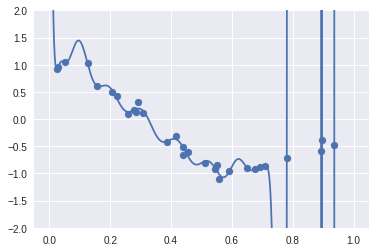

(array([ -1.47058834e+11,  -1.97163276e+03,   1.23198192e+05,
         -4.21057660e+06,   8.86121593e+07,  -1.22510253e+09,
          1.15872701e+10,  -7.68180665e+10,   3.60373792e+11,
         -1.18689531e+12,   2.64674773e+12,  -3.59660623e+12,
          1.88753616e+12,   1.89866571e+12,  -2.52445783e+12,
         -1.44269688e+12,   2.10978485e+12,   2.05822252e+12,
         -9.64563965e+11,  -2.48081671e+12,  -1.01496552e+12,
          1.42129932e+12,   2.28257405e+12,   1.08070050e+12,
         -9.43738037e+11,  -2.08561670e+12,  -1.68133413e+12,
         -2.13064748e+11,   1.27200938e+12,   1.94819414e+12,
          1.51905272e+12,   3.39209146e+11,  -9.15276504e+11,
         -1.70114359e+12,  -1.68545361e+12,  -9.62887996e+11,
          1.24319911e+11,   1.11169204e+12,   1.63443093e+12,
          1.53284281e+12,   8.63879546e+11,  -1.11965659e+11,
         -1.04512324e+12,  -1.58302191e+12,  -1.52901120e+12,
         -8.44268541e+11,   2.74666134e+11,   1.39687963e+12,
        

In [21]:
polyreg(50, 3)

** Overfitting occurs when feature diemension is inreasing in unresaonable scale. It makes weighs to have huge values.**

**THEN, how can we detect overfitting? and how to prevent it to occur?**

# 교차 검증

## 모형 검증

앞서 이야기 했듯이 모형의 모수 갯수를 증가시킨다든가 커널 모형, 신경망 모형과 같은 비선형 모형을 사용하게 되면 과최적화가 발생하여 트레이닝 데이터에 대한 예측 성능이 높아진다. 이러한 과최적화(overfitting)가 일어나면 트레이닝 데이터에 대해서는 예측이 잘되지만 테스트 데이터에 대해서는 예측 성능이 급격히 떨어지는 현상이 발생한다.

따라서 모형의 최종 성능을 객관적으로 측정하려면 트레이닝에 사용되지 않은 새로운 데이터, 즉 검증(validation)용 혹은 테스트(test)용 데이터를 사용해서 예측한 결과를 기반으로 성능을 계산해야 한다.

<img src="https://datascienceschool.net/upfiles/10b64c34d72445fc960de263bfde22d0.png">

## 교차 검증

일반적으로 테스트 데이터가 별도로 존재하는 경우가 많지 않기 때문에 보통은 원래 트레이닝용으로 확보한 데이터 중 일부를 떼어내어 테스트 데이터로 사용하는 경우가 많다. 그런데 트레이닝이나 테스트 데이터를 어떻게 골라내느냐에 따라 모형의 성능이 조금씩 달라질 수 있으므로 한 세트의 트레이닝/테스트 데이터만 사용하는 것이 아니라 여러가지 서로 다른 트레니인/테스트 데이터를 사용하여 복수의 테스트를 실시한 후 이 성능 자료로 부터 **평균 성능(mean performance)과 성능 분산(performance variance)**를 모두 구하는 것이 좋다.

이러한 테스트 방법을 **교차 검증(cross validation)**이라고 한다.

## Scikit-Learn의 교차 검증 기능

Scikit-Learn 의 model_selection 서브 패키지는 교차 검증을 위해 전체 데이터 셋에서 트레이닝용 데이터나 테스트용 데이터를 분리해 내는 여러가지 방법을 제공한다.

* data를 train set과 test set으로 단순 분리
 * data splitter
   * `train_test_split()` 명령


* 복수의 test set 준비
 * cross validation generator
   * `KFold`
   * `LeaveOneOut`
   * `ShuffleSplit`
 
* 복수의 test set 사용하여 평가 과정 반복
 * cross validation calculator
   * `cross_val_score()` 


### 단순 데이터 분리

`train_test_split()` 명령은 데이터를 단순히 트레이닝 데이터와 테스트 데이터로 분리한다.


* 인수
 * arrays : 데이터
 * test_size : 테스트 데이터 사이즈
 * train_size :  사이즈
 * random_state : 난수 시드

* 반환값
 * 배열 리스트

In [22]:
X = np.arange(10).reshape((5, 2))
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [23]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [26]:
y_train

array([2, 0, 3])

In [27]:
X_test

array([[2, 3],
       [8, 9]])

In [28]:
y_test

array([1, 4])

### K-fold CV

K-fold CV(cross-validation) 방법은 데이터 셋을 K개의 sub-set로 분리하는 방법이다. 분리된 K개의 sub-set 중 하나만 제외한 K-1개의 sub-sets를 training set으로 이용하여 K개의 모형 추정한다. 
 
<img src="https://docs.google.com/drawings/d/1JdgUDzuE75LBxqT5sKOhlPgP6umEkvD3Sm-gKnu-jqA/pub?w=762&h=651" style="margin: 0 auto 0 auto;">

Scikit-Learn 의 cross_validation 서브 패키지는 K-Fold를 위한 `KFold` 클래스를 제공한다.

In [29]:
N = 5
X = np.arange(8 * N).reshape(-1, 2) * 10
y = np.hstack([np.ones(N), np.ones(N) * 2, np.ones(N) * 3, np.ones(N) * 4])
print("X:\n", X, sep="")
print("y:\n", y, sep="")

X:
[[  0  10]
 [ 20  30]
 [ 40  50]
 [ 60  70]
 [ 80  90]
 [100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]
 [200 210]
 [220 230]
 [240 250]
 [260 270]
 [280 290]
 [300 310]
 [320 330]
 [340 350]
 [360 370]
 [380 390]]
y:
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.]


In [30]:
from sklearn.cross_validation import KFold
cv = KFold(len(X), n_folds=3, shuffle=True,random_state=5)
for train_index, test_index in cv:
    print("test  y:", test_index)
    print("." * 80 )        
    print("train y:", train_index)
    print("=" * 80 )

test  y: [ 1  2  5 11 12 17 19]
................................................................................
train y: [ 0  3  4  6  7  8  9 10 13 14 15 16 18]
test  y: [ 4  7  8  9 10 13 18]
................................................................................
train y: [ 0  1  2  3  5  6 11 12 14 15 16 17 19]
test  y: [ 0  3  6 14 15 16]
................................................................................
train y: [ 1  2  4  5  7  8  9 10 11 12 13 17 18 19]


/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.cross_validation import KFold
cv = KFold(len(X), n_folds=3, shuffle=True, random_state=5)
for train_index, test_index in cv:
    print("test  y:", y[test_index])
    print("." * 80 )        
    print("train y:", y[train_index])
    print("=" * 80 )

test  y: [ 1.  1.  2.  3.  3.  4.  4.]
................................................................................
train y: [ 1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  4.  4.  4.]
test  y: [ 1.  2.  2.  2.  3.  3.  4.]
................................................................................
train y: [ 1.  1.  1.  1.  2.  2.  3.  3.  3.  4.  4.  4.  4.]
test  y: [ 1.  1.  2.  3.  4.  4.]
................................................................................
train y: [ 1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.]


### Stratified K-Fold

* target class가 어느 한 data set에 몰리지 않도록 한다


In [32]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y, n_folds=3, random_state=0)
for train_index, test_index in cv:
    print("test X:\n", X[test_index])
    print("." * 80 )        
    print("test y:", y[test_index])
    print("=" * 80 )

test X:
 [[  0  10]
 [ 20  30]
 [100 110]
 [120 130]
 [200 210]
 [220 230]
 [300 310]
 [320 330]]
................................................................................
test y: [ 1.  1.  2.  2.  3.  3.  4.  4.]
test X:
 [[ 40  50]
 [ 60  70]
 [140 150]
 [160 170]
 [240 250]
 [260 270]
 [340 350]
 [360 370]]
................................................................................
test y: [ 1.  1.  2.  2.  3.  3.  4.  4.]
test X:
 [[ 80  90]
 [180 190]
 [280 290]
 [380 390]]
................................................................................
test y: [ 1.  2.  3.  4.]


In [33]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y, n_folds=3, random_state=0)
for train_index, test_index in cv:
    print("test X:\n", test_index)
    print("." * 80 )        
    print("test y:", test_index)
    print("=" * 80 )

test X:
 [ 0  1  5  6 10 11 15 16]
................................................................................
test y: [ 0  1  5  6 10 11 15 16]
test X:
 [ 2  3  7  8 12 13 17 18]
................................................................................
test y: [ 2  3  7  8 12 13 17 18]
test X:
 [ 4  9 14 19]
................................................................................
test y: [ 4  9 14 19]


### Leave-One-Out (LOO)

* 하나의 sample만을 test set으로 남긴다.

In [34]:
from sklearn.cross_validation import LeaveOneOut
cv = LeaveOneOut(5)
for train_index, test_index in cv:
    print("test X:", X[test_index])
    print("." * 80 )        
    print("test y:", y[test_index])
    print("=" * 80 )

test X: [[ 0 10]]
................................................................................
test y: [ 1.]
test X: [[20 30]]
................................................................................
test y: [ 1.]
test X: [[40 50]]
................................................................................
test y: [ 1.]
test X: [[60 70]]
................................................................................
test y: [ 1.]
test X: [[80 90]]
................................................................................
test y: [ 1.]


### Leave-One-Out (LOO)

* 하나의 sample만을 test set으로 남긴다.

In [35]:
from sklearn.cross_validation import LeaveOneOut
cv = LeaveOneOut(5)
for train_index, test_index in cv:
    print("test X:", X[test_index])
    print("." * 80 )        
    print("test y:", y[test_index])
    print("=" * 80 )

test X: [[ 0 10]]
................................................................................
test y: [ 1.]
test X: [[20 30]]
................................................................................
test y: [ 1.]
test X: [[40 50]]
................................................................................
test y: [ 1.]
test X: [[60 70]]
................................................................................
test y: [ 1.]
test X: [[80 90]]
................................................................................
test y: [ 1.]


### Label K-Fold

* 같은 label이 test와 train에 동시에 들어가지 않게 조절
* label에 의한 영향을 최소화


In [36]:
from sklearn.cross_validation import LabelKFold
cv = LabelKFold(y, n_folds=3)
for train_index, test_index in cv:
    print("test  y:", y[test_index])
    print("." * 80 )        
    print("train y:", y[train_index])
    print("=" * 80 )

test  y: [ 1.  1.  1.  1.  1.  4.  4.  4.  4.  4.]
................................................................................
train y: [ 2.  2.  2.  2.  2.  3.  3.  3.  3.  3.]
test  y: [ 3.  3.  3.  3.  3.]
................................................................................
train y: [ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  4.  4.  4.  4.  4.]
test  y: [ 2.  2.  2.  2.  2.]
................................................................................
train y: [ 1.  1.  1.  1.  1.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.]


### ShuffleSplit = Bootstrapping

* 중복된 데이터를 허용

In [37]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(5)
for train_index, test_index in cv:
    print("test X:", X[test_index])
    print("=" * 20 )        

test X: [[60 70]]
test X: [[20 30]]
test X: [[20 30]]
test X: [[20 30]]
test X: [[ 0 10]]
test X: [[80 90]]
test X: [[ 0 10]]
test X: [[80 90]]
test X: [[ 0 10]]
test X: [[20 30]]


## 교차 평가 시행 

CV는 단순히 데이터 셋을 나누는 역할을 수행할 뿐이다. 실제로 모형의 성능(편향 오차 및 분산)을 구하려면 이렇게 나누어진 데이터셋을 사용하여 평가를 반복하여야 한다. 이 과정을 자동화하는 명령이 `cross_val_score()` 이다.


* `cross_val_score(estimator, X, y=None, scoring=None, cv=None)` 
 * cross validation iterator `cv`를 이용하여 `X`, `y` data 를 분할하고 `estimator`에 넣어서 `scoring` metric을 구하는 과정을 반복


* 인수
 * estimator : ‘fit’메서드가 제공되는 모형
 * X : 배열
   * 독립 변수 데이터
 * y : 배열
   * 종속 변수 데이터
 * scoring : 문자열
   * 성능 검증에 사용할 함수
 * cv : Cross Validator
   * None 이면 디폴트인  3-폴드 CV
   * 숫자 K  이면 K-폴드 CV
   * Cross Validator 클래스 객체

* 반환값
  * scores 
      * 계산된 성능 값의 리스트

In [38]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)
model = LinearRegression()
cv = KFold(1000, 10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = mean_squared_error(y_test, y_pred)

scores

array([ 301.58271911,  341.91498985,  410.58098438,  499.68109613,
        461.00979825,  384.106544  ,  434.90159273,  377.65506997,
        366.60959935,  371.14031438])

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)

array([-301.58271911, -341.91498985, -410.58098438, -499.68109613,
       -461.00979825, -384.106544  , -434.90159273, -377.65506997,
       -366.60959935, -371.14031438])

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
cv_score = cross_val_score(model, X, y, scoring="r2", cv=cv)

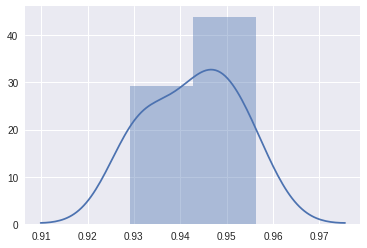

In [41]:
sns.distplot(cv_score)

In [42]:
np.mean(cv_score)

0.94267032698237807

In [43]:
np.std(cv_score)

0.0090750621266875824

**$R^2$를 이야기할 떄는 다음과 같이 이야기해야 한다.**

$$R^2 = 0.943 \pm 0.01$$

최적화 과정에서 +, -에 따라 '좋은'모델이 결정되므로 이를 통일해줘야 할 필요가 있다. 따라서 MSE의경우 크면 더 나쁜것이므로 -를 붙인다. 

즉 '높으면 좋다'라는 전제로 진행한다.

**성능은 test data로만 이야기해라 training data성능은 필요없다.**

# 정규화 선형 회귀 

정규화(regularized) 선형 회귀 방법은 선형 회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다.  일반적으로 다음과 같은 세가지 방법이 사용된다.

* Ridge 회귀 모형 
* Lasso 회귀 모형 
* Elastic Net 회귀 모형

## Ridge 회귀 모형

Ridge 회귀 모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum w_i^2
\end{eqnarray}
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀 모형이 된다.

## Lasso 회귀 모형

Lasso(Least Absolute Shrinkage and Selection Operator) 회귀 모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum | w_i |
\end{eqnarray}
$$

## Elastic Net 회귀 모형

Elastic Net 회귀 모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.


$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda_1 \sum | w_i | + \lambda_2 \sum w_i^2
\end{eqnarray}
$$

$\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

## statsmodels의 정규화 회귀 모형

statsmodels 패키지는 OLS 선형 회귀 모형 클래스의 `fit_regularized` 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.

* http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

하이퍼 모수는 다음과 같이 모수 $\text{alpha} $ 와 $\text{L1_wt}$ 로  정의된다.

$$
0.5 \times \text{RSS}/N + \text{alpha} \times \big( 0.5 \times (1-\text{L1_wt})\sum w_i^2 + \text{L1_wt} \sum |w_i| \big)
$$

In [44]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.tools.tools.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

model = OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept        0.830090
x               19.456558
I(x ** 2)     -439.348916
I(x ** 3)     3909.347641
I(x ** 4)   -18329.176670
I(x ** 5)    49280.750793
I(x ** 6)   -78994.113638
I(x ** 7)    74769.482224
I(x ** 8)   -38598.716758
I(x ** 9)     8381.793809
dtype: float64

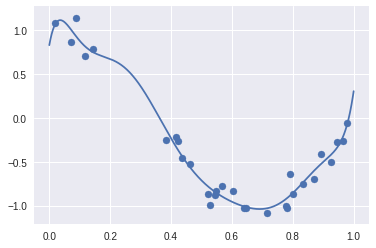

In [45]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.tools.tools.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()
    
plot_statsmodels(result1)    

모수 `L1_wt`가 0 이면 순수 Ridge 모형이 된다.

[ 0.71898166 -2.0182248  -0.89543969 -0.12925871  0.26102527  0.43349369
  0.48959485  0.48587358  0.45309744  0.40785743]


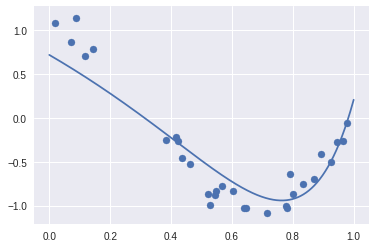

In [46]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2) 

반대로 모수 `L1_wt`가 1 이면 순수 Lasso 모형이 된다.

Intercept    0.872429
x           -2.900711
I(x ** 2)    0.000000
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.918716
I(x ** 6)    0.627920
I(x ** 7)    0.354740
I(x ** 8)    0.139104
I(x ** 9)    0.000000
dtype: float64


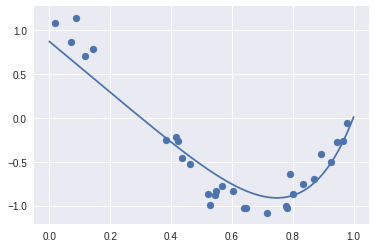

In [47]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3) 

모수 `L1_wt`가 0과 1 사이이면 Elastic Net 모형이다.

Intercept    0.791629
x           -2.485280
I(x ** 2)   -0.334919
I(x ** 3)    0.000000
I(x ** 4)    0.018108
I(x ** 5)    0.440759
I(x ** 6)    0.549247
I(x ** 7)    0.498811
I(x ** 8)    0.388577
I(x ** 9)    0.268337
dtype: float64


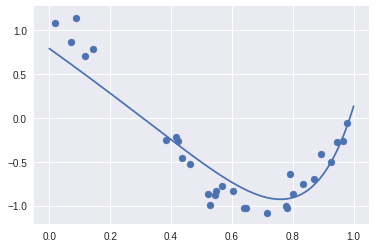

In [48]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4) 

## Scikit-Learn의 정규화 회귀 모형

Scikit-Learn 패키지에서는 정규화 회귀 모형을 위한 `Ridge`, `Lasso`, `ElasticNet` 이라는 별도의 클래스를 제공한다. 각 모형에 대한 최적화 목적 함수는 다음과 같다.

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

$$
\text{RSS} + \text{alpha} \sum w_i^2
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

$$
0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i|
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

$$
0.5 \times \text{RSS}/N + 0.5 \times \text{alpha} \times \big(0.5 \times  (1-\text{l1_ratio})\sum w_i^2 + \text{l1_ratio} \sum |w_i| \big)
$$


In [49]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[  0.00000000e+00   1.94565584e+01  -4.39348916e+02   3.90934764e+03
  -1.83291767e+04   4.92807508e+04  -7.89941136e+04   7.47694822e+04
  -3.85987167e+04   8.38179381e+03]


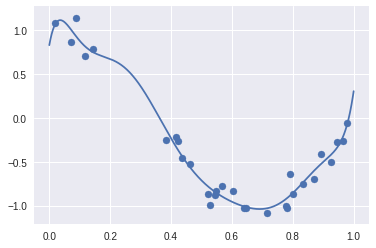

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X[:, np.newaxis], y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -3.57707392 -1.24253699  0.65176155  1.39935489  1.3811883
  0.96006837  0.37104071 -0.25111269 -0.83604486]


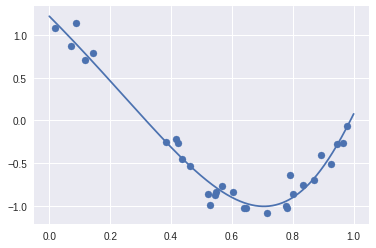

In [51]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X[:, np.newaxis], y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -3.03534727 -0.          0.          0.          0.
  2.13679879  0.          0.          0.        ]


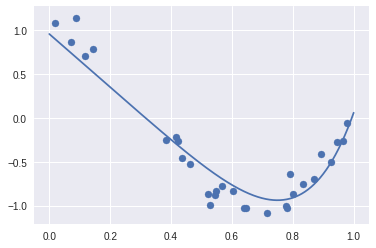

In [52]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X[:, np.newaxis], y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -2.57943186 -0.26229281  0.          0.03701941  0.38586371
  0.4994734   0.48920509  0.41804678  0.32084092]


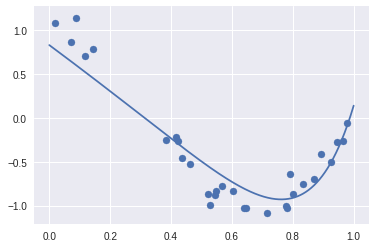

In [53]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X[:, np.newaxis], y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

## 정규화 모형의 장점

정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.

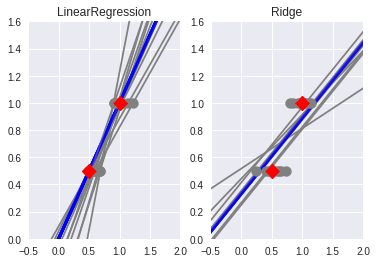

In [54]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[-1, 3].T
np.random.seed(0)

models = {"LinearRegression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1)}

for i, (name, model) in enumerate(models.items()):
    ax = plt.subplot(1, 2, i+1)
    for _ in range(10):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        model.fit(this_X, y_train)
        ax.plot(X_test, model.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=100, c='.5', marker='o', zorder=10)
        model.fit(X_train, y_train)
        ax.plot(X_test, model.predict(X_test), linewidth=3, color='blue', alpha=0.5)
        ax.scatter(X_train, y_train, s=100, c='r', marker='D', zorder=10)
        plt.title(name)
        ax.set_xlim(-0.5, 2)
        ax.set_ylim(0, 1.6)

## Ridge 모형과 Lasso 모형의 차이

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

<img src="https://datascienceschool.net/upfiles/10a19727037b4898984a4330c1285486.png">

LASSO에서 0이 많이 생기는 이유: 기존 최적화 코스트에 penalizing.

Langrange Multiplier이다!

$ f + \lambda g$: penalty가 g라고 할 때 duality를 활용해 다음과 같은 문제로 바뀐다.

최적화를 하는데 위의 파란 제약조건 내에서 최적화를 해야하는 것이다.

LASSO는 최저점이 보통 모서리 지점에서 많이 생기게 된다. 반면 RIDGE의 경우 모서리라고 할만한 부분이 없다. 모서리에서 0이된다. 즉 페널티를 많이 주게되면 w를 찾을 수 있는 영역을 줄이게되는데 이는 위의 파란 사각형의 면적이 줄어들게 됨을 의미하며 영역이 줄어들때 모서리에서 최저점이 생길 가능성이 커진다.

In [55]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [56]:
ridge0 = Ridge(alpha=0).fit(X, y)
p0 = pd.Series(np.hstack([ridge0.intercept_, ridge0.coef_]))
ridge1 = Ridge(alpha=1).fit(X, y)
p1 = pd.Series(np.hstack([ridge1.intercept_, ridge1.coef_]))
ridge2 = Ridge(alpha=2).fit(X, y)
p2 = pd.Series(np.hstack([ridge2.intercept_, ridge2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-10.012198,29.465746,33.684368
2,-239.819089,-83.154885,-41.040187
3,519.839787,306.351627,223.029964
4,324.390428,201.629434,152.203371
5,-792.184162,5.909369,20.941211
6,476.745838,-29.515927,-2.749722
7,101.044570,-152.040465,-121.063689
8,177.064176,117.311715,103.717329
9,751.279321,262.944995,195.099906


In [57]:
lasso0 = Lasso(alpha=0.0001).fit(X, y)
p0 = pd.Series(np.hstack([lasso0.intercept_, lasso0.coef_]))
lasso1 = Lasso(alpha=0.1).fit(X, y)
p1 = pd.Series(np.hstack([lasso1.intercept_, lasso1.coef_]))
lasso2 = Lasso(alpha=10).fit(X, y)
p2 = pd.Series(np.hstack([lasso2.intercept_, lasso2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-9.910816,-0.000000,0.000000
2,-239.727144,-155.362882,0.000000
3,519.881966,517.182017,0.000000
4,324.294322,275.082351,0.000000
5,-784.988701,-52.540269,0.000000
6,471.210031,-0.000000,0.000000
7,97.612539,-210.159753,-0.000000
8,175.802361,0.000000,0.000000
9,748.684614,483.914409,0.000000


0이 된 놈들은 설명력이 제일 약한 놈들이다. $\lambda$를 늘려가면서 out되는 순서를 보면 변수별로 설명도의 중요도를 볼 수 있다.

## path 메서드

`Lasso` 와 `ElasticNet`  클래스는 하이퍼 모수 `alpha` 값의 변화에 따른 계수의 변화를 자동으로 계산하는 `path` 메서드를 제공한다.
`lasso_path()`, `enet_path()` 명령어도 `path` 메서드와 동일한 기능을 수행한다.

# 최적 정규화

회귀 모형에서 모형 구조나 하이퍼 파라미터 등을 바꾸면 모형의 성능이 달라진다. 따라서 최적의 성능을 가져올 수 있는 모형 구조나 하이퍼 파라미터를 선택하는 과정이 필요하다.

## 다항 회귀의 차수 결정

다항회귀에서 차수를 바꾸어가면서 오차와 분산을 측정하면 다음과 같다.

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score

n_samples = 1000
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
X = X[:, np.newaxis]
K = 100

def cv_mse(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
    scores = -cross_val_score(model, X, y, "neg_mean_squared_error", cv=K)
    return scores

0.0130824469849 0.00760649444156


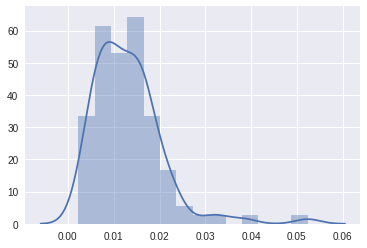

In [59]:
scores1 = cv_mse(3)
sns.distplot(scores1)
print(scores1.mean(), scores1.std())

In [60]:
D = 9
degrees = 2**np.arange(D)
all_scores = np.zeros((K, D))
for i, d in enumerate(degrees):
    scores = cv_mse(d)
    all_scores[:, i] = scores
df = pd.DataFrame(-np.log(all_scores), columns=degrees)
df.describe()

,1,2,4,8,16,32,64,128,256
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.152711,3.431163,4.735579,4.757005,4.746504,4.662804,4.582827,4.521753,4.432050
std,1.197341,0.801431,0.470647,0.464274,0.481903,0.694141,1.284681,1.809063,2.612276
min,-0.143751,1.023711,3.757597,3.746899,3.703365,-0.224238,-6.675069,-12.469001,-20.912594
25%,1.283354,2.877161,4.449526,4.447033,4.426598,4.389639,4.324049,4.305559,4.347323
50%,1.912740,3.341536,4.659961,4.698884,4.686885,4.666667,4.708778,4.681581,4.663582
75%,2.922163,3.963974,5.023880,5.012029,5.031434,5.032878,5.030201,5.034346,5.011352
max,5.195028,5.061568,6.386555,6.284238,6.139299,6.340676,6.238571,6.524705,6.373727


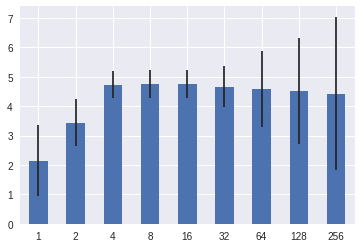

In [61]:
df.mean().plot(kind="bar", rot=0, yerr=df.std())
plt.show()

## 정규화 하이퍼 모수 최적화

정규화 모형에서 하이퍼 모수가 바뀌는 경우에도 마찬가지로 최적의 하이퍼 모수를 찾는 작업이 필요하다.

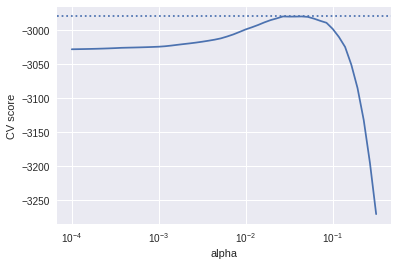

In [62]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score

data = load_diabetes()
X = data.data[:200]
y = data.target[:200]

model = Lasso()
alphas = np.logspace(-4, -.5, 50)

scores = list()

for alpha in alphas:
    model.alpha = alpha
    this_scores = cross_val_score(model, X, y, "neg_mean_squared_error", cv=5)
    scores.append(np.mean(this_scores))

plt.semilogx(alphas, scores)
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':')
plt.show()

0.0439397056076


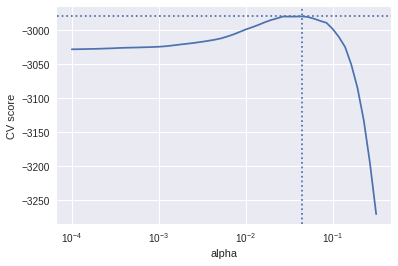

In [63]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

print(lasso_cv.alpha_ )

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

## One Standard Error Rule

성능 오차를 고려해서 어느 정도 오차는 감수하더라도 더 단순한(정규화 모형에서는 더 제약 조건이 강한) 모형을 선택하는 것이 실용적이다. 예를 들어 One Standard Error Rule 은 최적 모형상에서 교차 검증을 통해 성능 오차의 분산값을 구하고 이 값 정도의 성능 감소가 있더라도 최적 모형보다 더 단순하거나 제약조건이 더 강한 모형을 선택한다.

0.117876863479


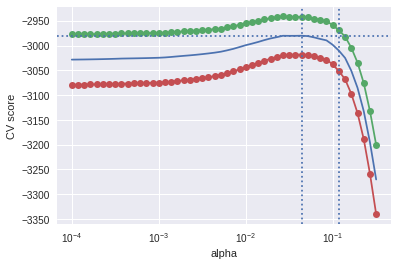

In [64]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

scores = -lasso_cv.mse_path_.mean(axis=1)
scores_std = lasso_cv.mse_path_.std(axis=1)
scores_std1 = scores + scores_std / np.sqrt(len(lasso_cv.mse_path_)) #1 sigma
scores_std2 = scores - scores_std / np.sqrt(len(lasso_cv.mse_path_))

alpha_1se = lasso_cv.alphas_[np.argmax(scores_std1 > np.max(scores))]
print(alpha_1se)

plt.semilogx(lasso_cv.alphas_, scores)
plt.semilogx(lasso_cv.alphas_, scores_std1, 'o-')
plt.semilogx(lasso_cv.alphas_, scores_std2, 'o-')
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.axvline(alpha_1se, linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [65]:
scores_std

array([ 494.92344017,  446.48982588,  399.73945291,  360.20869508,
        329.08590697,  305.00167132,  291.02675123,  280.97667994,
        273.53779337,  271.16911062,  269.46853762,  268.27995266,
        268.69880868,  269.82171815,  271.92478805,  275.92467796,
        282.8740455 ,  289.00459112,  295.39092402,  301.79602995,
        307.38405455,  312.29383374,  317.52061879,  322.45427273,
        326.96673965,  330.98187777,  335.1519068 ,  338.96813049,
        342.22819275,  345.01038681,  347.38275923,  349.4041568 ,
        350.89633286,  351.93494827,  352.81148437,  353.78063767,
        354.84509495,  355.74714443,  356.51142752,  357.15911802,
        357.70832018,  358.12948668,  358.30521164,  358.45486489,
        358.5823102 ,  358.69050716,  358.78250048,  358.86061954,
        358.92703214,  358.98341695])

너는 -2975정도의 성능을 기대하고 최대값을 설정하려 했겠지만 그정도의 성능은 1$\sigma$에서 $10^{-1}$정도에서도 낼 수 있다. 

근데 실제로 자주 쓰지는 않고 그냥 최대값 나오는건 쓰자. 대단한 이득이 없다.

# 회귀 분석 진단

## 확률론적 선형 회귀 분석의 기본 가정

확률론적 선형 회귀 분석에서는 종속 변수와 독립 변수에 대해 다음과 같은 가정을 하고 있다.

## 가정 1. 종속 변수의 분포에 대한 가정

선형 회귀 분석의 기본 가정은 종속 변수가 독립 변수의 선형 조합으로 결정되는 기댓값과 고정된 분산을 가지는 정규 분포라는 것이다.

$$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$


이는 오차(disturbance) $ \epsilon_i$ 개념으로 변환 하면 다음과 같다.

$$ \epsilon_i = y - w^Tx $$

1. 선형 정규 분포 가정
 * 종속 변수 $y$는 기댓값 $w^Tx$, 분산 $\sigma^2$ 를 가지는 정규 분포 확률 변수이다.
   $$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$ <br>
 * 따라서 오차(disturbance)  $ \epsilon = y-w^Tx $ 도 정규 분포 확률 변수이다.
   $$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ <br>

2. 외생성(Exogeneity) 가정
 * 오차 $\epsilon$와 독립 변수 $x$는 서로 독립이다. 즉, $ \text{E}[\epsilon] = 0$ 은 $x$의 값에 상관없이 유지된다.
   $$ \text{E}[\epsilon \mid x] = 0$$ <br>
   
3. 조건부 독립 가정
 * $i$번째 샘플의 오차 $\epsilon_i$와 $j$번째 샘플의 오차 $\epsilon_j$는 $x$에 대해 서로 조건부 독립이다.
   $$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0$$ 


## 가정 2. 독립 변수에 대한 가정

**독립 변수의 공분산 행렬은 full rank 이어야 한다. 즉, 서로 독립인 성분이 독립 변수의 갯수만큼 존재해야 한다.**

## 선형 회귀 모형 진단

선형 회귀 모형의 진단(diagnosis)이란 선형 회귀에 사용된 데이터들이 이러한 선형 회귀 모형의 가정을 제대로 만족하고 있는지를 확인하는 과정이다. 진단은 보통 다음과 같은 검정들로 이루어진다.


1. 잔차에 대한 정규성 검정
2. 잔차에 대한 자기상관계수 검정
3. 독립 변수에 대한 condition number 계산



In [66]:
from sklearn.datasets import make_regression
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.tools.tools.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.21e-36
Time:                        17:25:43   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 기본 가정을 침해하는 문제들

### 이분산 문제

선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 이분산(heteroskedastic) 문제가 발생한다.


<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Heteroscedasticity.png">

이분산 문제를 해결하는 방법 주의 하나는 종속 변수를 log 변환하거나 box-cox 변환하는 것이다.

[[school_notebook:3f485c426a4b49fc9de95a02137ca6b4]]

### 자기 상관 계수 문제

선형 회귀 모형에서는 오차(disturbance)들이 서로 (모수-조건부) 독립이라고 가정하고 있다. 따라서 잔차(residual)도 서로 독립이어야 한다. 만약 서로 독립이 아니라면 기본 선형 회귀 모형이 아닌 ARMA 모형 등의 시계열 모형을 사용해야 한다.

서로 독립인지는 잔차를 시계열로 가정하여 자기상관계수를 구한다. 독립 가정을 만족하면 시차(lag)가 0인 경우를 제외하고는 자기상관계수 $\rho_l$ 이 0이어야 한다. 이를 검사하는 검증으로는 다음과 같은 것들이 있다.

* Box-Pierce 검정
* Ljung-Box 검정
* Durbin-Watson

이 검정들은 다음과 같은 귀무 가설을 검증한다.

$$
H_0: \rho_l = 0 \;\;\;\text{ for all } i, i \neq 0
$$


[[school_notebook:3ea68ac37aa846e58a8c330aad0bdbd1]]

### 다중공선성 문제

다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.

독립 변수가 서로 의존하게 되면 이른바 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해치게 된다. 이를 방지하는 방법들은 다음과 같다.

* 변수 선택법으로 의존적인 변수 삭제
* PCA(principal component analysis) 방법으로 의존적인 성분 삭제
* regularized 방법 사용

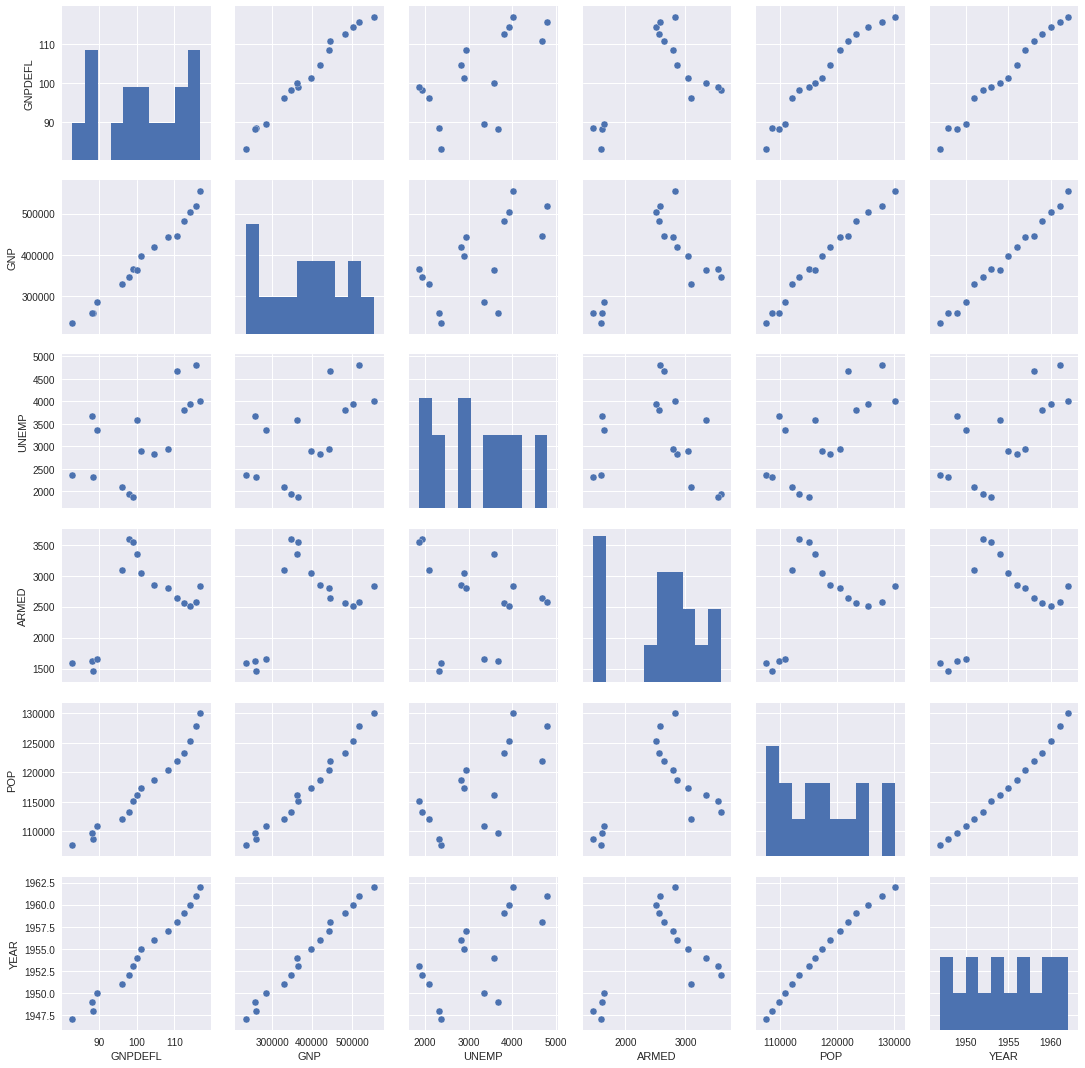

In [67]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
sns.pairplot(X)
plt.show()

**x1, x2가 다른데이터라고 하지만 multicollinearity가 높으면 사실상 두 변수는 같은 데이터를 제공하고 있다고 볼 수 있다. 데이터의 변화에 따라 모델이 민감하게 반응할 수 있다. 즉 오버피팅의 일종이다. 따라서 regularization을 하거나 feature자체를 제외할 수 있다. 만약 feature를 버리기 싫은데 correlation이 크다면 선형변환을 통해 알짜성분만을 이용해 새로운 x를 만들어 활용하면 된다.**

In [68]:
X = sm.tools.tools.add_constant(X)
ols_model = OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           4.98e-10
Time:                        17:25:47   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


컨디션 넘버가 나쁘다 =
주어진 feature벡터가 독립이 아니다. (multicollinearity)

# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다.

## 차원 축소

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다.

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

<img src="https://alliance.seas.upenn.edu/~cis520/dynamic/2014/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png" style="width:40%; margin: 0 auto 0 auto;">


<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

## PCA와 고유값 분해

PCA는 수학적으로 다음과 같은 직교 변환 행렬 $W$을 찾는 것과 동일하다.

$$
\hat{X} = X W
$$

여기에서 $X \in \mathbf{R}^{N\times D}$, $\hat{X} \in \mathbf{R}^{N\times \hat{D}}$, $(\hat{D} < D)$, $W \in \mathbf{R}^{D\times \hat{D} }$ 이고 $\hat{X}$의 값은 위에서 설명한 차원 축소 특징을 가져야 한다.

$W$ 값은 공분산 행렬 $XX^T$의 고유값 분해(eigenvalue decomposition)를 사용하여 찾을 수 있다. $W$의 각 열은 가장 큰 고유값부터 $\hat{D}$개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다.

### Scikit-Learn 의 PCA 기능

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수
    * 최종 성분의 수


* 속성:	
 * `components_`
    * 주성분 축
 * `n_components_` 
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

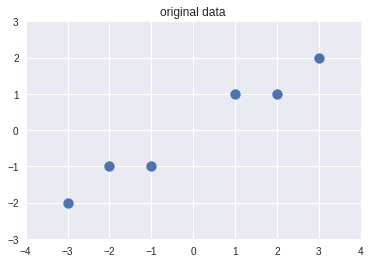

In [69]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [72]:
w, V = np.linalg.eig(pca.get_covariance())

In [73]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

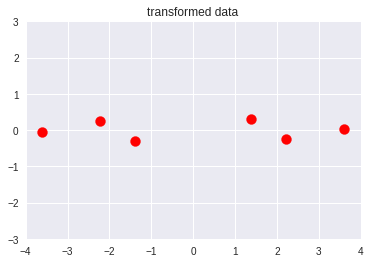

In [74]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

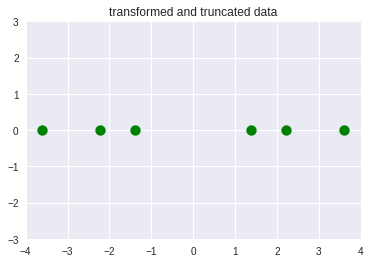

In [75]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## IRIS 데이터의 예

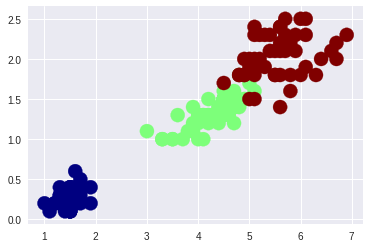

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

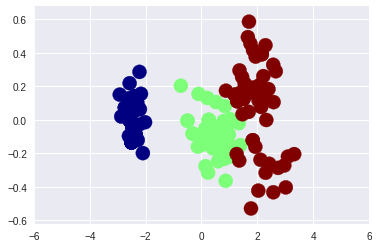

In [77]:
X2 = PCA(2).fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

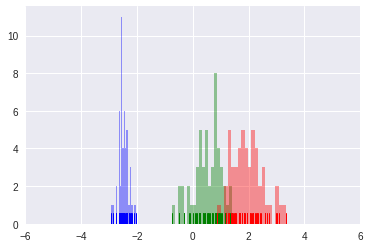

In [78]:
X1 = PCA(1).fit_transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

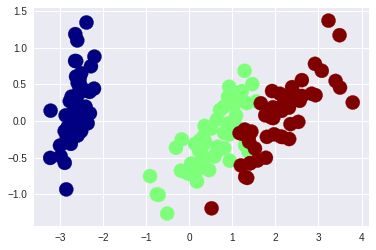

In [79]:
X3 = PCA(2).fit_transform(iris.data)
plt.scatter(X3[:, 0], X3[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

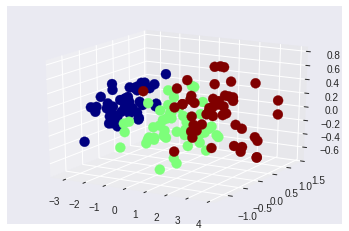

In [80]:
X4 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X4[:,0], X4[:,1], X4[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca(-60)

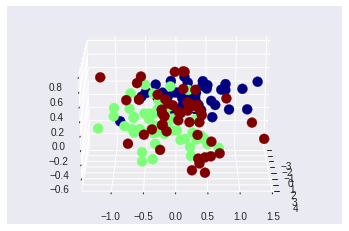

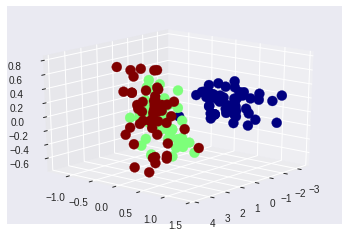

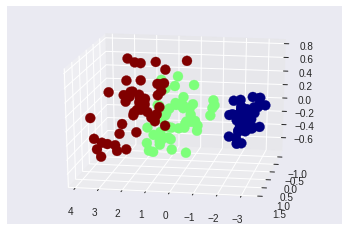

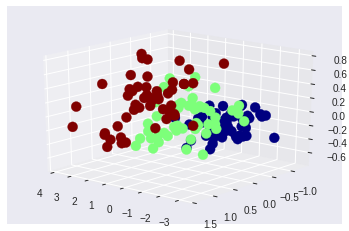

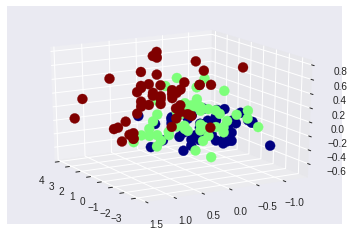

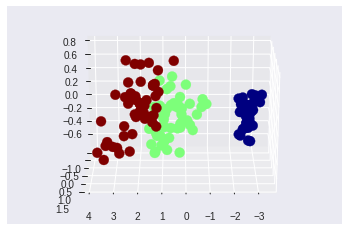

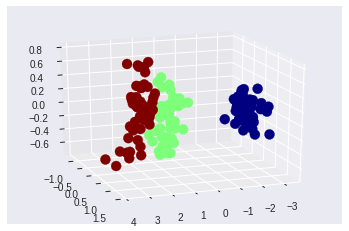

In [81]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

## 이미지 PCA

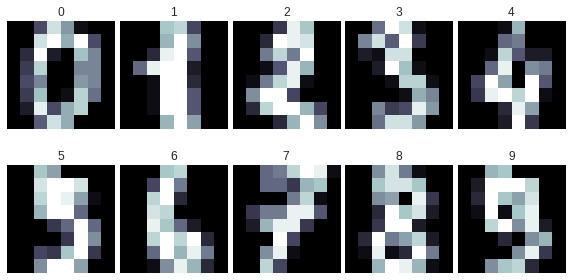

In [83]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 10)


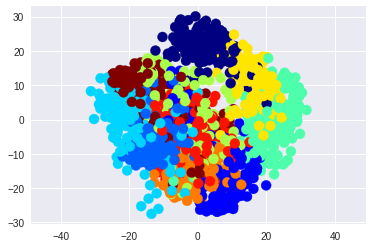

In [85]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=plt.cm.jet)
plt.axis("equal")
plt.show()

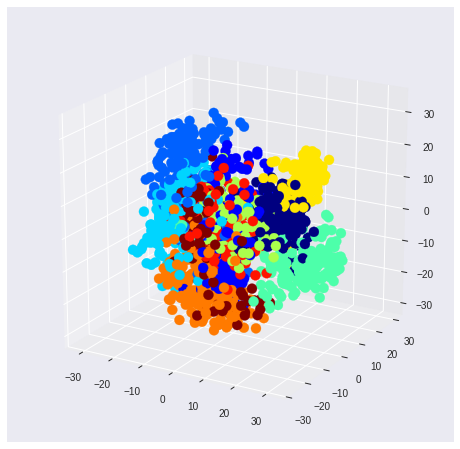

In [86]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca2(-60)

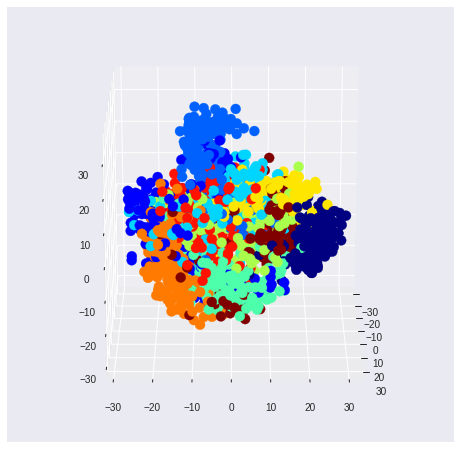

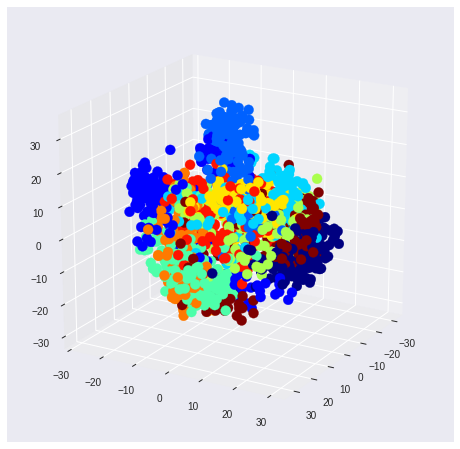

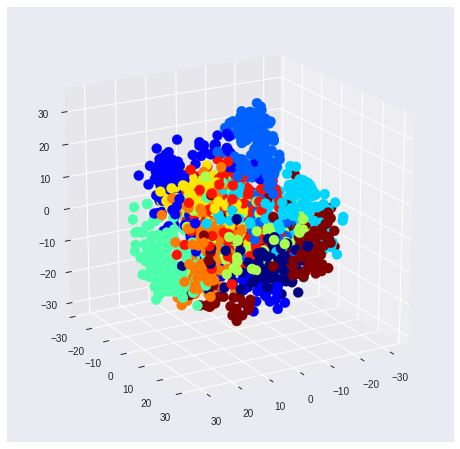

In [87]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

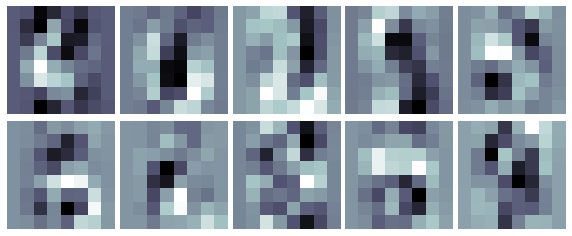

In [88]:
N=2; M=5;
fig = plt.figure(figsize=(10,3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((8,8)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])    
        plt.grid(False)

## Kernal PCA

데이터의 분리성을 향상시키기 위해 비선형 변환 $\phi(x)$ 을 한 데이터에 대해서 다시 PCA 적용하는 방법을 Kernel PCA라고 한다.

$$ x \;\; \rightarrow \;\; \phi(x) \;\; \rightarrow \;\; \text{PCA} \;\; \rightarrow \;\; z $$

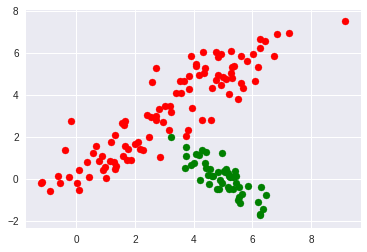

In [89]:
A1_mean = [1, 1]
A1_cov = [[2, 1], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, 1], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack([A1, A2])
B_mean = [5, 0]
B_cov = [[0.8, -0.7], [-0.7, 0.8]]
B = np.random.multivariate_normal(B_mean, B_cov, 50)
AB = np.vstack([A, B])

plt.scatter(A[:,0], A[:,1], c='r')
plt.scatter(B[:,0], B[:,1], c='g')
plt.show()

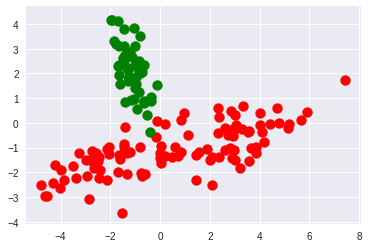

In [90]:
pca = PCA(n_components=2)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed[:,0], A_transformed[:,1], c="r", s=100)
plt.scatter(B_transformed[:,0], B_transformed[:,1], c="g", s=100)
plt.show()

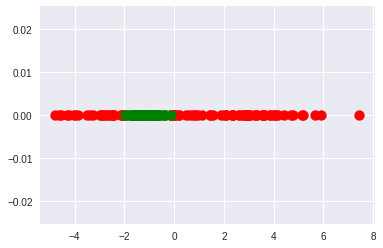

In [91]:
pca = PCA(n_components=1)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed, np.zeros(len(A_transformed)), c="r", s=100)
plt.scatter(B_transformed, np.zeros(len(B_transformed)), c="g", s=100)
plt.show()

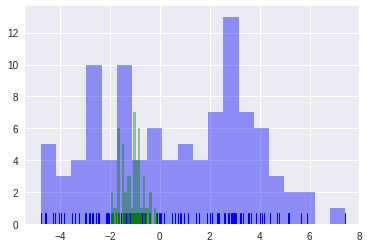

In [92]:
sns.distplot(A_transformed, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed, color="g", bins=20, rug=True, kde=False)
plt.show()

In [93]:
from sklearn.decomposition import KernelPCA

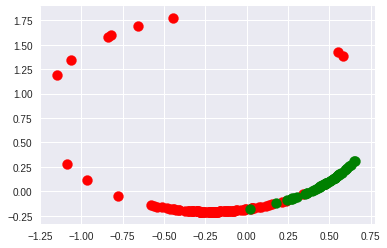

In [94]:
kpca = KernelPCA(kernel="cosine", n_components=2)
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="g", s=100)
plt.show()

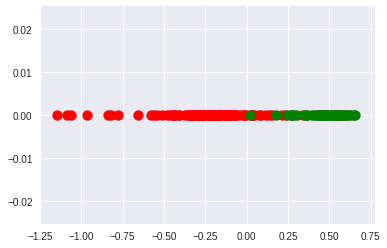

In [95]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="cosine", n_components=1)
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2, np.zeros(len(A_transformed2)), c="r", s=100)
plt.scatter(B_transformed2, np.zeros(len(B_transformed2)), c="g", s=100)
plt.show()

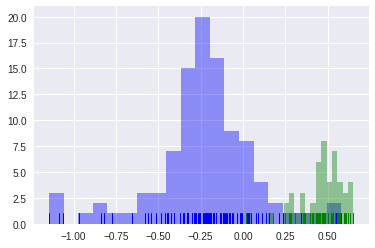

In [96]:
sns.distplot(A_transformed2, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed2, color="g", bins=20, rug=True, kde=False)
plt.show()

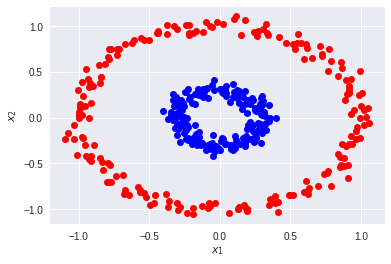

In [97]:
from sklearn.datasets import make_circles
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

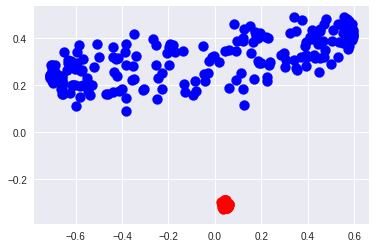

In [98]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
kpca.fit(X)
A_transformed2 = kpca.transform(X[reds])
B_transformed2 = kpca.transform(X[blues])
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="b", s=100)
plt.show()

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

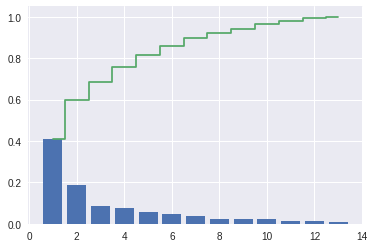

In [99]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

pca = PCA().fit(X)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

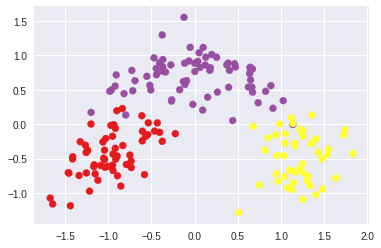

In [102]:
import matplotlib as mpl
X_pca = PCA(2).fit_transform(X)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

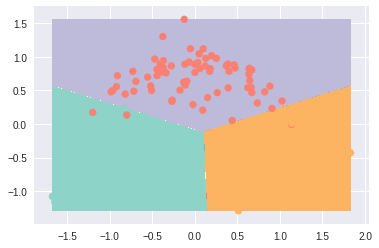

In [103]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_pca, y)

xmin, xmax = X_pca[:,0].min(), X_pca[:,0].max()
ymin, ymax = X_pca[:,1].min(), X_pca[:,1].max()
XGrid, YGrid = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZGrid = np.reshape(clf.predict(np.array([XGrid.ravel(), YGrid.ravel()]).T), XGrid.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XGrid, YGrid, ZGrid, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

## 파이프라인

In [104]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

model1 = linear_model.LogisticRegression()
model1.fit(X_digits, y_digits)

pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X_digits, y_digits)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_digits, model1.predict(X_digits)))
print(classification_report(y_digits, model2.predict(X_digits)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      1.00      0.98       182
          2       0.99      1.00      1.00       177
          3       0.99      0.99      0.99       183
          4       0.99      0.99      0.99       181
          5       0.99      0.99      0.99